# –õ–µ–∫—Ü–∏—è 3. Z-test

In [1]:
from scipy.stats import (
    norm, binom, expon
)
import numpy as numpy
from seaborn import distplot
from matplotlib import pyplot
import seaborn

import sys
sys.path.append('.')

In [2]:
def inverse_plot_colorscheme():
    import cycler
    def invert(color_to_convert): 
        table = str.maketrans('0123456789abcdef', 'fedcba9876543210')
        return '#' + color_to_convert[1:].lower().translate(table).upper()
    update_dict = {}
    for key, value in pyplot.rcParams.items():
        if value == 'black':
            update_dict[key] = 'white'
        elif value == 'white':
            update_dict[key] = 'black'
    
    old_cycle = pyplot.rcParams['axes.prop_cycle']
    new_cycle = []
    for value in old_cycle:
        new_cycle.append({
            'color': invert(value['color'])
        })
    pyplot.rcParams.update(update_dict)
    pyplot.rcParams['axes.prop_cycle'] = cycler.Cycler(new_cycle)
    lec = pyplot.rcParams['legend.edgecolor']
    lec = str(1 - float(lec))
    pyplot.rcParams['legend.edgecolor'] = lec

In [3]:
inverse_plot_colorscheme()

–ù–∞—á–∏–Ω–∞—è —Å —Å–µ–≥–æ–¥–Ω—è—à–Ω–µ–π –ª–µ–∫—Ü–∏–∏ –º—ã –±—É–¥–µ–º –∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å —Å—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤—ã–±–æ—Ä–æ–∫. –î–ª—è –Ω–∞—á–∞–ª–∞ –∑–∞–¥–∞–¥–∏–º—Å—è –≤–æ–ø—Ä–æ—Å–æ–º: **–∑–∞—á–µ–º –≤–æ–æ–±—â–µ –∏—Ö –∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å?**

–ú–æ–∂–Ω–æ –ø—Ä–∏–≤–µ—Å—Ç–∏ —Å–ª–µ–¥—É—é—â–∏–µ —Ä–µ–∞–ª—å–Ω—ã–µ –ø—Ä–∏–º–µ—Ä—ã –∏–∑ –ø—Ä–∞–∫—Ç–∏–∫–∏:
1. –ü—Ä–∏—Ä–æ—Å—Ç –≤—ã—Ä—É—á–∫–∏. 
    - –ï—Å–ª–∏ —Ä–∞—Å—Ç–µ—Ç —Å—É–º–º–∞—Ä–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ $\Leftrightarrow$ —Ä–∞—Å—Ç–µ—Ç —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ. –ü–æ—ç—Ç–æ–º—É —ç—Ç—É –∑–∞–¥–∞—á—É –º–æ–∂–Ω–æ –ø–µ—Ä–µ—Ñ–æ—Ä–º—É–ª–∏—Ä–æ–≤–∞—Ç—å –∫–∞–∫ —Ä–æ—Å—Ç —Å—Ä–µ–¥–Ω–µ–≥–æ —á–µ–∫–∞, –∏–ª–∏ ARPU.
2. –£–≤–µ–ª–∏—á–µ–Ω–∏–µ —á–∏—Å–ª–∞ –ø–æ–∫—É–ø–æ–∫.
3. –£–º–µ–Ω—å—à–µ–Ω–∏–µ –æ—Ç—Ç–æ–∫–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π.

...

–ê–Ω–∞–ª–∏–∑ —Å—Ä–µ–¥–Ω–µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è —è–≤–ª—è–µ—Ç—Å—è –æ–¥–Ω–æ–π –∏–∑ –Ω–∞–∏–±–æ–ª–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö –∑–∞–¥–∞—á –≤ —Ä–∞–±–æ—Ç–µ –∞–Ω–∞–ª–∏—Ç–∏–∫–∞, –ø–æ—ç—Ç–æ–º—É –æ—á–µ–Ω—å –≤–∞–∂–Ω–æ —É–º–µ–Ω—Ç—å –µ–µ —Ä–µ—à–∞—Ç—å.

----

–î–∞–ª–µ–µ, –¥–ª—è –≤—ã–≤–æ–¥–∞ –≤—Å–µ—Ö –∫—Ä–∏—Ç–µ—Ä–∏–µ–≤ –Ω–∞–º –ø–æ—Ç—Ä–µ–±—É–µ—Ç—Å—è –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ. *–ü–æ—Ç–æ–º—É —á—Ç–æ –∏–º–µ–Ω–Ω–æ —ç—Ç–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é –ø–æ–¥—á–∏–Ω—è–µ—Ç—Å—è —Å—Ä–µ–¥–Ω–µ–µ –≤—ã–±–æ—Ä–æ–∫*.

–ü–æ—ç—Ç–æ–º—É –¥–∞–≤–∞–π—Ç–µ –ø–æ—Å–º–æ—Ç—Ä–∏–º, —á—Ç–æ —ç—Ç–æ –≤–æ–æ–±—â–µ —Ç–∞–∫–æ–µ, –∫–∞–∫ —Å –Ω–∏–º —Ä–∞–±–æ—Ç–∞—Ç—å –≤ Python –∏ –∫–∞–∫–∏–µ —É –Ω–µ–≥–æ –µ—Å—Ç—å —Å–≤–æ–π—Ç—Å–≤–∞.

## 1 —á–∞—Å—Ç—å: –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ

–ù–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ $\mathcal{N}(\mu, \sigma^2)$ ‚Äî –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ, –≤ –∫–æ—Ç–æ—Ä–æ–º –ø–ª–æ—Ç–Ω–æ—Å—Ç—å —É–±—ã–≤–∞–µ—Ç —Å —Ä–æ—Å—Ç–æ–º —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –æ—Ç $\mu$ –ø–æ —ç–∫—Å–ø–æ–Ω–µ–Ω—Ç–µ –∫–≤–∞–¥—Ä–∞—Ç–∞.

$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2},
$$

–≥–¥–µ
- $\mu$ &mdash; –ø–∞—Ä–∞–º–µ—Ç—Ä —Å–¥–≤–∏–≥–∞: –Ω–∞—Å–∫–æ–ª—å–∫–æ —Ü–µ–Ω—Ç—Ä —Å–¥–≤–∏–Ω—É—Ç –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ 0
- $\sigma^2$ &mdash; –ø–∞—Ä–∞–º–µ—Ç—Ä –º–∞—Å—à—Ç–∞–±–∞: –Ω–∞—Å–∫–æ–ª—å–∫–æ "–ø–æ–ª–æ–≥–∏–π" –±—É–¥–µ—Ç –≥—Ä–∞—Ñ–∏–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è

<img src="https://raw.githubusercontent.com/dimalunin2016/pictures/main/image%20(8).png" width="1000" height="200" />


### –ö–∞–∫ –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º –≤ Python

–ü—É—Å—Ç—å –º—ã —Ö–æ—Ç–∏–º –∑–∞–¥–∞—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ $\mathcal{N}(\mu, \sigma^2)$. –î–ª—è —ç—Ç–æ–≥–æ –µ—Å—Ç—å [–∫–ª–∞—Å—Å](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) `norm`. 

*–ü–∞—Ä–∞–º–µ—Ç—Ä—ã –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏*
- `loc` &mdash; —ç—Ç–æ $\mu$
- `scale` &mdash; —ç—Ç–æ $\sigma$, –∏–ª–∏ **—Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ**. –ù–µ –¥–∏—Å–ø–µ—Ä—Å–∏—è!

–ú–µ—Ç–æ–¥—ã –∫–ª–∞—Å—Å–∞:
- `norm().cdf(x)` &mdash; —Ñ—É–Ω–∫—Ü–∏—è —Ä–∞—Å–ø–µ–¥–µ–ª–µ–Ω–∏—è –≤ —Ç–æ—á–∫–µ x. $P(\xi \leq x)$
- `norm().ppf(q)` &mdash; –ø–æ–ª—É—á–∏—Ç—å –∫–≤–∞–Ω—Ç–∏–ª—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
- `norm().pdf(x)` &mdash; –ø–æ–ª—É—á–∏—Ç—å –ø–ª–æ—Ç–Ω–æ—Å—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤ —Ç–æ—á–∫–µ x.

In [4]:
# –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è
stand_norm = norm(loc=0, scale=1)

In [5]:
# cumulative distribution function
print(f"P(X <= 2)  = {stand_norm.cdf(x=2)}")
print(f"–∏–ª–∏ —Ç–∞–∫ {norm(loc=0, scale=1).cdf(x=2)}")
# –º–æ–∂–Ω–æ —É–∫–∞–∑—ã–≤–∞—Ç—å –º–∞—Å—Å–∏–≤—ã
print(f"[P(X <= 2), P(X <= -1)] = {stand_norm.cdf([2, -1])}")

P(X <= 2)  = 0.9772498680518208
–∏–ª–∏ —Ç–∞–∫ 0.9772498680518208
[P(X <= 2), P(X <= -1)] = [0.97724987 0.15865525]


In [6]:
# percent point function
print(f"quantile 0.975 = {stand_norm.ppf(0.975)}")

quantile 0.975 = 1.959963984540054


In [7]:
# probability density function
print(f"pdf(0) = {stand_norm.pdf(0)}")

pdf(0) = 0.3989422804014327


–ù–∞—Ä–∏—Å—É–µ–º –≥—Ä–∞—Ñ–∏–∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è:

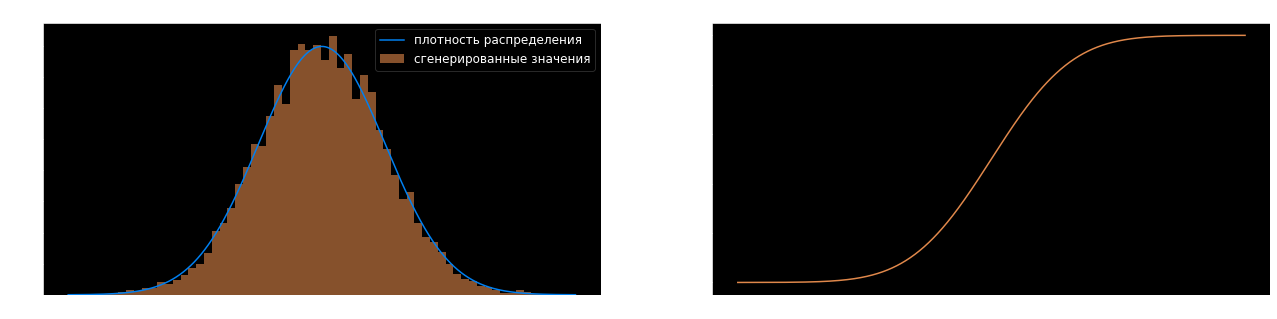

In [8]:
check_distr = norm(loc=0, scale=2)
x = numpy.linspace(-8, 8, 1000) # —Ä–∞—Å—Å—Ç–∞–≤–∏—Ç –Ω–∞ —Ä–∞–≤–Ω—ã—Ö —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è—Ö –¥—Ä—É–≥ –æ—Ç –¥—Ä—É–≥–∞ 1000 —Ç–æ—á–µ–∫ –æ—Ç -8 –¥–æ 8
pdf = check_distr.pdf(x)
cdf = check_distr.cdf(x)
sample = check_distr.rvs(10000)

pyplot.figure(figsize=(22, 5))

pyplot.subplot(1, 2, 1)
pyplot.title('–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏', fontsize=12, color='white')
pyplot.hist(sample, bins='auto', density=True, alpha=0.6, label='—Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è') # rvs
pyplot.plot(x, pdf, label='–ø–ª–æ—Ç–Ω–æ—Å—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è') # pdf
pyplot.legend(fontsize=12)
###################################
pyplot.subplot(1, 2, 2)
pyplot.title('–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ñ—É–Ω–∫—Ü–∏–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è', fontsize=12)
pyplot.plot(x, cdf) # cdf
pyplot.show()

### –°–≤–æ–π—Å—Ç–≤–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è

- $\xi_1 \sim \mathcal{N}(\mu_1, \sigma_1^2),\ \xi_2 \sim \mathcal{N}(\mu_2, \sigma_2^2) \Rightarrow \xi_1 + \xi_2 \sim \mathcal{N}(\mu_1 + \mu_2, \sigma_1^2 + \sigma_2^2)$, [–¥–æ–∫-–≤–æ](https://en.wikipedia.org/wiki/Sum_of_normally_distributed_random_variables#:~:text=This%20means%20that%20the%20sum,squares%20of%20the%20standard%20deviations)
- $a \xi_1 \sim \mathcal{N}(a\mu_1, a^2\sigma_1^2)$, –¥–æ–∫-–≤–æ –Ω–∞ –≤–∞—Å)

–ü–æ–∫–∞–∂–µ–º –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ—Å—Ç—å —ç—Ç–∏—Ö —Ñ–æ—Ä–º—É–ª –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ:

–°–Ω–∞—á–∞–ª–∞ –ø—Ä–æ–≤–µ—Ä–∏–º –Ω–∞ –ø—Ä–∏–º–µ—Ä–µ –Ω–∞ —Ñ–æ—Ä–º—É–ª—É 1:

In [9]:
# –ø—Ä–∏–º–µ—Ä—ã
first_mean = 3
first_var = 4

second_mean = -1
second_var = 2

first_dist = norm(loc=first_mean, scale=numpy.sqrt(first_var))
second_dist = norm(loc=second_mean, scale=numpy.sqrt(second_var))
# –í–∞–∂–Ω–æ scale=numpy.sqrt(first_var + second_var)
checking_sum_distr = norm(loc=first_mean + second_mean, scale=numpy.sqrt(first_var + second_var))

1. –ù–∞–≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º –≤—ã–±–æ—Ä–∫—É –∏–∑ 1 –∏ 2 —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π –∏ –ø—Ä–æ—Å—É–º–º–∏—Ä—É–µ–º –∏—Ö.
2. –î–∞–ª–µ–µ, –ø–æ—Å—Ç—Ä–æ–∏–º —ç–º–ø–∏—Ä–∏—á–µ—Å–∫—É—é –ø–ª–æ—Ç–Ω–æ—Å—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∏ —Å—Ä–∞–≤–Ω–∏–º –µ–µ —Å –Ω–∞—Å—Ç–æ—è—â–µ–π –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ.

/root/Python3.7/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


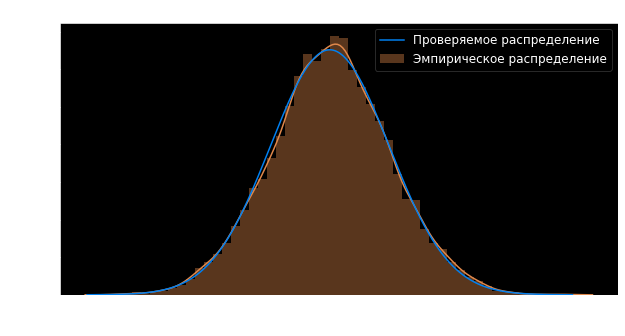

In [10]:
first_sample = first_dist.rvs(10000)
second_sample = second_dist.rvs(10000)
sum_sample = first_sample + second_sample

x = numpy.linspace(-8, 12, 1000)

pyplot.figure(figsize=(10, 5))
pyplot.title('–ü—Ä–æ–≤–µ—Ä–∫–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π', fontsize=12)
# –≠—Ç–∞ —Ñ—É–Ω–∫—Ü–∏—è —Å—Ç—Ä–æ–∏—Ç –∫–∞–∫ –≥–∏—Å—Ç–æ—Ä–≥–∞–º–º—É –∑–Ω–∞—á–µ–Ω–∏–π, —Ç–∞–∫ –∏ —ç–º–ø–∏—Ä–∏—á–µ—Å–∫–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ
distplot(sum_sample, label='–≠–º–ø–∏—Ä–∏—á–µ—Å–∫–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ')
pyplot.plot(x, checking_sum_distr.pdf(x), label='–ü—Ä–æ–≤–µ—Ä—è–µ–º–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ')
pyplot.legend(fontsize=12)
pyplot.xlabel('X', fontsize=12)
pyplot.ylabel('–ü–ª–æ—Ç–Ω–æ—Å—Ç—å', fontsize=12)
pyplot.show()

–í–∏–¥–Ω–æ, —á—Ç–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø—Ä–∏–º–µ—Ä–Ω–æ —Å–æ–≤–ø–∞–ª–∏! –ê –∑–Ω–∞—á–∏—Ç –º—ã —É–¥–æ—Å—Ç–æ–≤–µ—Ä–∏–ª–∏—Å—å, —á—Ç–æ —Ñ–æ—Ä–º—É–ª–∞ –≤–µ—Ä–Ω–∞. 

–í—Ç–æ—Ä–æ–µ —É—Ç–≤–µ—Ä–∂–¥–µ–Ω–∏–µ –º–æ–∂–Ω–æ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å —Ç–∞–∫–∏–º –∂–µ –æ–±—Ä–∞–∑–æ–º –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ.

## 2 —á–∞—Å—Ç—å: –¶–ü–¢

–î–ª—è –Ω–∞—á–∞–ª–∞ –≤—Å–ø–æ–º–Ω–∏–º —Ç–µ–æ—Ä–µ–º—É, –∫–æ—Ç–æ—Ä–∞—è —è–≤–ª—è–µ—Ç—Å—è –æ—Å–Ω–æ–≤–æ–ø–æ–ª–∞–≥–∞—é—â–µ–π —Ç–µ–æ—Ä–µ–º–æ–π –¥–ª—è –≤—Å–µ—Ö –∫—Ä–∏—Ç–µ—Ä–∏–µ–≤, –∫–æ—Ç–æ—Ä—ã–µ –º—ã —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º –≤ –±–ª–∏–∂–∞–π—à–∏—Ö –ª–µ–∫—Ü–∏—è—Ö.

**–¶–µ–Ω—Ç—Ä–∞–ª—å–Ω–∞—è –ø—Ä–µ–¥–µ–ª—å–Ω–∞—è —Ç–µ–æ—Ä–µ–º–∞**

*–§–æ—Ä–º—É–ª–∏—Ä–æ–≤–∫–∞ —Ç–µ–æ—Ä–µ–º—ã*

–ü—É—Å—Ç—å $\xi_1, ..., \xi_n$ &mdash; **–Ω–µ–∑–∞–≤–∏—Å–∏–º–æ** –æ–¥–∏–Ω–∞–∫–æ–≤–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã–µ —Å–ª—É—á–∞–π–Ω—ã–µ –≤–µ–ª–∏—á–∏–Ω—ã, —É –∫–æ—Ç–æ—Ä—ã—Ö —Å—É—â–µ—Å—Ç—É—é—Ç –º–∞—Ç. –æ–∂–∏–¥–∞–Ω–∏–µ –∏ –¥–∏—Å–ø–µ—Ä—Å–∏—è: $E [\xi_i] = \mu < \infty$ –∏ $Var[\xi_i] = \sigma^2 < \infty$. —Ç–æ–≥–¥–∞ $\sqrt{n}\dfrac{\overline \xi - \mu}{\sqrt{\sigma^2}}$ [—Å—Ö–æ–¥–∏—Ç—Å—è –ø–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é](https://en.wikipedia.org/wiki/Convergence_in_distribution) –∫ $\mathcal{N}(0, 1)$.

*–ß—Ç–æ —ç—Ç–æ –∑–Ω–∞—á–∏—Ç –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ*

–ï—Å–ª–∏ —Å–ª—É—á–∞–π–Ω—ã–µ –≤–µ–ª–∏—á–∏–Ω—ã –≤ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–µ **–Ω–µ–∑–∞–≤–∏—Å–∏–º—ã –∏ –æ–¥–∏–Ω–∞–∫–æ–≤–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã** –∏ –≤–∞—à–∞ –≤—ã–±–æ—Ä–∫–∞ **–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –±–æ–ª—å—à–∞—è**, —Ç–æ –≤—ã –º–æ–∂–µ—Ç–µ –ø–æ–ª–∞–≥–∞—Ç—å, —á—Ç–æ 
$$
\sqrt{n}\dfrac{\overline \xi - \mu}{\sqrt{\sigma^2}} \sim \mathcal{N}(0, 1),
$$

–≥–¥–µ $\mu, \sigma^2$ &mdash; –º–∞—Ç. –æ–∂–∏–¥–∞–Ω–∏–µ –∏ –¥–∏—Å–ø–µ—Ä—Å–∏—è –æ–¥–Ω–æ–≥–æ —ç–ª–µ–º–µ–Ω—Ç–∞ –≤—ã–±–æ—Ä–∫–∏.


*–î–æ–ø–æ–ª–Ω–µ–Ω–∏–µ*

–°–ª—É—á–∞–π–Ω—ã–µ –≤–µ–ª–∏—á–∏–Ω—ã –º–æ–≥—É—Ç –±—ã—Ç—å —Å–ª–∞–±–æ –∑–∞–≤–∏—Å–∏–º—ã –¥—Ä—É–≥ –æ—Ç –¥—Ä—É–≥–∞ –∏ —Å–ª–µ–≥–∫–∞ –ø–æ-—Ä–∞–∑–Ω–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã. –¶–µ–Ω—Ç—Ä–∞–ª—å–Ω–∞—è –ø—Ä–µ–¥–µ–ª–µ–Ω—å–Ω–∞—è —Ç–µ–æ—Ä–º–∞ –≤—Å–µ –µ—â–µ –±—É–¥–µ—Ç [–≤–µ—Ä–Ω–∞](https://en.wikipedia.org/wiki/Stable_distribution#A_generalized_central_limit_theorem).


–ù–µ—Å–º–æ—Ç—Ä—è –Ω–∞ –æ—Å–ª–∞–±–ª–µ–Ω–∏–µ —É—Å–ª–æ–≤–∏–π, **–≤—Å–µ–≥–¥–∞ –¥–µ—Ä–∂–∏—Ç–µ –≤ –≥–æ–ª–æ–≤–µ —É—Å–ª–æ–≤–∏—è –ø—Ä–∏–º–µ–Ω–∏–º–æ—Å—Ç–∏ –¶–ü–¢**: –∑–∞–±—ã–≤ –ø—Ä–æ –Ω–∏—Ö –∏ –Ω–µ –ø—Ä–≤–µ—Ä–∏–≤ —Å–≤–æ–π –∫—Ä–∏—Ç–µ—Ä–∏–π, –≤—ã –º–æ–∂–µ—Ç–µ –Ω–µ–∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ –ø—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å —Å–≤–æ–π AB-—Ç–µ—Å—Ç.

### –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¶–ü–¢

–ß—Ç–æ–±—ã –ª—É—á—à–µ –ø–æ–Ω–∏–º–∞—Ç—å, –∫–∞–∫ —Ä–∞–±–æ—Ç–∞–µ—Ç –¶–ü–¢, —è –ø—Ä–µ–¥–ª–∞–≥–∞—é –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å —Ç–µ–æ—Ä–µ–º—É: –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å—Ä–µ–¥–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ —Ä–∞–∑–Ω—ã—Ö –≤—ã–±–æ—Ä–∫–∞—Ö. –ö–∞–∫ –º—ã —ç—Ç–æ —Å–¥–µ–ª–∞–µ–º?

- –ß—Ç–æ–±—ã –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å, —á—Ç–æ –Ω–µ–∫–æ—Ç–æ—Ä–∞—è —Å–ª—É—á–∞–π–Ω–∞—è –≤–µ–ª–∏—á–∏–Ω–∞ –∏–∑ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è, –Ω–∞–º –Ω—É–∂–Ω–∞ –≤—ã–±–æ—Ä–∫–∞ —ç—Ç–∏—Ö —Å–ª—É—á–∞–π–Ω—ã—Ö –≤–µ–ª–∏—á–∏–Ω.
- –í –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –Ω–∞–º –Ω—É–∂–Ω–∞ –≤—ã–±–æ—Ä–∫–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫ –∏–∑ –¶–ü–¢. –ü–æ—ç—Ç–æ–º—É –Ω–∞–º –Ω—É–∂–Ω–æ –Ω–∞–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å N –≤—ã–±–æ—Ä–æ–∫ –ø–æ M —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –≤ –∫–∞–∂–¥–æ–π.
    - –ü–æ –∫–∞–∂–¥–æ–π –≤—ã–±–æ—Ä–∫–µ –Ω–∞–¥–æ –ø–æ—Å—á–∏—Ç–∞—Ç—å –Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ —Å—Ä–µ–¥–Ω–µ–µ –ø–æ M —ç–ª–µ–º–µ–Ω—Ç–∞–º.
    - –í –∏—Ç–æ–≥–µ –º—ã –ø–æ–ª—É—á–∏–º –≤—ã–±–æ—Ä–∫—É –∏–∑ N —ç–ª–µ–º–µ–Ω—Ç–æ–≤.
    - –û–Ω–∞ –∏ –¥–æ–ª–∂–Ω–∞ –±—ã—Ç—å –∏–∑ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.

In [11]:
def visualize_CLT(sample_generator, expected_value, variance):
    """
        –§—É–Ω–∫—Ü–∏—è-–≤–∏–∑—É–∞–ª–∏–∑–∞—Ç–æ—Ä –¶–ü–¢. –°—Ç—Ä–æ–∏—Ç:
            - –≥–∏—Å—Ç–æ—Ä–≥–∞–º–º—É —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –¶–ü–¢,
            - —ç–º–ø–∏—Ä–∏—á–µ—Å–∫—É—é –ø–ª–æ—Ç–Ω–æ—Å—Ç—å,
            - –ø–ª–æ—Ç–Ω–æ—Å—Ç—å –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è.
        –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
            - sample_generator: —Ñ—É–Ω–∫—Ü–∏—è-–≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä –≤—ã–±–æ—Ä–∫–∏. –ù–µ –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –Ω–∏—á–µ–≥–æ –Ω–∞ –≤—Ö–æ–¥
            - expected_value: –º–∞—Ç. –æ–∂–∏–¥–∞–Ω–∏–µ –≤—ã–±–æ—Ä–∫–∏
            - variance: –¥–∏—Å–ø–µ—Ä—Å–∏—è –≤—ã–±–æ—Ä–∫–∏
    """

    numpy.random.seed(42)
    N = 5000
    clt_sample = []
    for _ in range(N):
        # –≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º N —Ä–∞–∑ –≤—ã–±–æ—Ä–∫—É
        sample = sample_generator()

        # —Å—á–∏—Ç–∞–µ–º —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –∏–∑ –¶–ü–¢
        sample_size = len(sample)
        statistic = numpy.sqrt(sample_size) * (numpy.mean(sample) - expected_value) / numpy.sqrt(variance)

        #—Å–æ—Ö—Ä–∞–Ω—è–µ–º
        clt_sample.append(statistic)

    x = numpy.linspace(-4, 4, 1000)
    pyplot.figure(figsize=(10, 5))
    pyplot.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å—Ä–µ–¥–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π', fontsize=12)
    seaborn.distplot(clt_sample, label='–≠–º–ø–∏—Ä–∏—á–µ—Å–∫–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ')
    pyplot.plot(x, norm().pdf(x), label='$\mathcal{N}(0, 1)$')
    pyplot.legend(fontsize=12)
    pyplot.xlabel('X', fontsize=12)
    pyplot.ylabel('–ü–ª–æ—Ç–Ω–æ—Å—Ç—å', fontsize=12)
    pyplot.show()

–î–ª—è –Ω–∞—á–∞–ª–∞ –ø—Ä–æ–≤–µ—Ä–∏–º –±–∏–Ω–æ–º–∏–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ, –∫–æ—Ç–æ—Ä–æ–µ –º—ã —É–∂–µ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–ª–∏ —Ä–∞–Ω–µ–µ.

In [12]:
def binom_generator(p, n, size):
    return binom(p=p, n=n).rvs(size)

/root/Python3.7/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


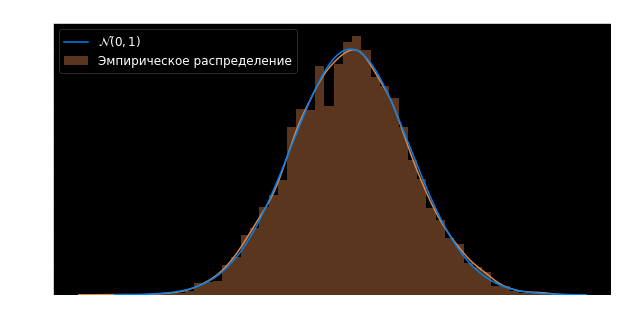

In [13]:
p = 0.01
n = 20
size = 5000

# –º—ã –æ–±–æ—Ä–∞—á–∏–≤–∞–µ–º binom_generator –≤ lambda, —á—Ç–æ–±—ã —Ñ—É–Ω–∫—Ü–∏—è –Ω–µ –ø—Ä–∏–Ω–∏–º–∞–ª–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –Ω–∞ –≤—Ö–æ–¥
visualize_CLT(lambda: binom_generator(p, n, size), 
              expected_value = p * n, 
              variance = n * p * (1 - p)
             )

–≠–º–ø–∏—Ä–∏—á–µ—Å–∫–∞—è –ø–ª–æ—Ç–Ω–æ—Å—Ç—å "–ø–æ—á—Ç–∏" —Å–æ–≤–ø–∞–ª–∞ —Å –∏—Å—Ç–∏–Ω–Ω–æ–π. –ê —á—Ç–æ –µ—Å–ª–∏ —É–º–µ–Ω—å—à–∏—Ç—å –≤—ã–±–æ—Ä–∫—É, –ø–æ –∫–æ—Ç–æ—Ä–æ–π —Å—á–∏—Ç–∞–µ—Ç—Å—è —Å—Ä–µ–¥–Ω–µ–µ?

/root/Python3.7/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


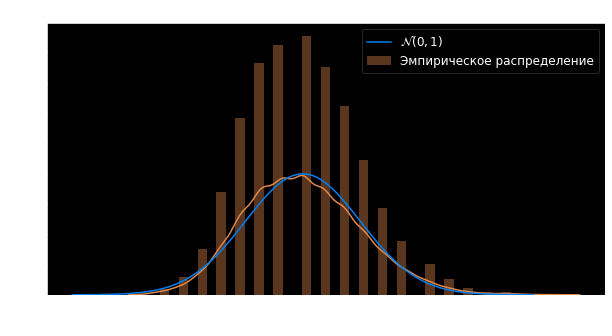

In [14]:
p = 0.01
n = 20
size = 40

visualize_CLT(lambda: binom_generator(p, n, size), 
              expected_value = p * n, 
              variance = n * p * (1 - p)
             )

–°—Ç–∞–ª–æ —Å–∏–ª—å–Ω–æ —Ö—É–∂–µ: –ø–æ—è–≤–∏–ª–∏—Å—å –ø—Ä–æ–±–µ–ª—ã –≤ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–∏, –¥–∞ –∏ —Å–∞–º–∞ —ç–º–ø–∏—Ä–∏—á–µ—Å–∫–∞—è —Ñ—É–Ω–∫—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Å–ª–µ–≥–∫–∞ "—Å–¥–≤–∏–Ω—É—Ç–∞". –¢–∞–∫ —á—Ç–æ –Ω–∞—à —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç –ø–æ–¥—Ç–≤–µ—Ä–¥–∏–ª –≤–∞–∂–Ω–æ—Å—Ç—å —Ä–∞–∑–º–µ—Ä–∞ –≤—ã–±–æ—Ä–∫–∏ –¥–ª—è –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–π —Ä–∞–±–æ—Ç—ã –¶–ü–¢.


–¢–µ–ø–µ—Ä—å –¥–∞–≤–∞–π—Ç–µ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –¥—Ä—É–≥–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ: [—ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–µ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html).

In [15]:
def expon_generator(expected_value, size):
    return expon(scale=expected_value).rvs(size)

/root/Python3.7/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


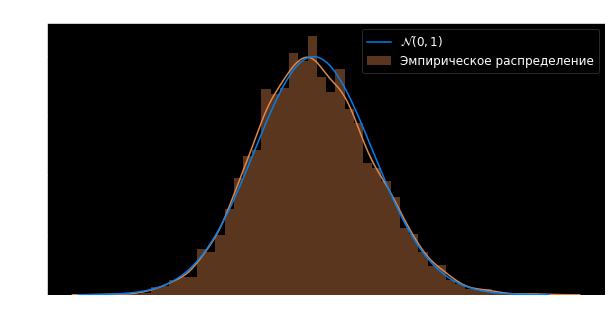

In [16]:
expected_value = 24
size = 400

visualize_CLT(lambda: expon_generator(expected_value, size), 
              expected_value=expected_value, variance=expected_value ** 2)

–í–∏–¥–∏–º, —á—Ç–æ –∏ —Ç—É—Ç –≤—Å–µ —Ö–æ—Ä–æ—à–æ —Ä–∞–±–æ—Ç–∞–µ—Ç!

**–≠–∫–≤–∏–≤–∞–ª–µ–Ω—Ç–Ω—ã–µ —Ñ–æ—Ä–º—É–ª–∏—Ä–æ–≤–∫–∏ –¶–ü–¢**

$$\begin{align}
\sqrt{n}\dfrac{\overline \xi - \mu}{\sqrt{\sigma^2}} &\sim \mathcal{N}(0, 1) \stackrel{—Å–≤. 2}{\Leftrightarrow}\\
\overline \xi - \mu &\sim \mathcal{N}\left(0, \dfrac{\sigma^2}{n} \right) \Leftrightarrow\\
\dfrac{\underset{i=1}{\overset{n}{\sum}} \xi_i}{n} &\sim \mathcal{N}\left(\mu, \dfrac{\sigma^2}{n} \right) \Leftrightarrow\\
\underset{i=1}{\overset{n}{\sum}} \xi_i &\sim \mathcal{N}\left(n \cdot \mu, n \cdot \sigma^2 \right)
\end{align}$$

–ê –∑–Ω–∞—á–∏—Ç —Å—É–º–º–∞ —Å–ª—É—á–∞–π–Ω—ã—Ö –≤–µ–ª–∏—á–∏–Ω —Ç–∞–∫–∂–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ

## –ß–∞—Å—Ç—å 3: Z-–∫—Ä–∏—Ç–µ—Ä–∏–π –§–∏—à–µ—Ä–∞


> üìà **–ó–∞–¥–∞—á–∞**
>
> –í—ã –ø—Ä–∏–¥—É–º–∞–ª–∏ –∏–¥–µ—é –¥–ª—è —Å—Ç–∞—Ä—Ç–∞–ø–∞, –≥–¥–µ –∫—É—Ä—å–µ—Ä—ã —Å–æ–±–∏—Ä–∞—é—Ç –∑–∞–∫–∞–∑—ã –¥–ª—è –∫–ª–∏–µ–Ω—Ç–æ–≤ –∏ –æ—Ç–≤–æ–∑—è—Ç –∏–º –Ω–∞ –¥–æ–º. –°—Ç–æ–∏–º–æ—Å—Ç—å –∑–∞–∫–∞–∑–∞ –≤ –≤–∞—à–µ–º —Å—Ç–∞—Ä—Ç–∞–ø–µ &mdash; 10–ö ‚ÇΩ, –∞ —Å—Ç–æ–∏–º–æ—Å—Ç—å —Ä–∞–±–æ—Ç—ã –∫—É—Ä—å–µ—Ä–∞ &mdash; 5–ö ‚ÇΩ.
–°–ø–µ—Ü–∏—Ñ–∏–∫–∞ –≤–∞—à–µ–≥–æ —Å—Ç–∞—Ä—Ç–∞–ø–∞ —Ç–∞–∫–æ–≤–∞, —á—Ç–æ –µ—Å—Ç—å –±–æ–ª—å—à–æ–π —Ä–∏—Å–∫ –≤–æ–∑–≤—Ä–∞—Ç–∞ –±–µ–∑ –æ–ø–ª–∞—Ç—ã. –° —É—á–µ—Ç–æ–º —Å—Ç–æ–∏–º–æ—Å—Ç–µ–π, –∏–Ω–≤–µ—Å—Ç–æ—Ä—ã –≥–æ—Ç–æ–≤—ã –ø—Ä–æ—Å–ø–æ–Ω—Å–∏—Ä–æ–≤–∞—Ç—å –≤–∞–º –∏–Ω—Ñ—Ä–∞—Å—Ç—Ä—É–∫—Ç—É—Ä—É –∏ –ø—Ä–∏–≤–ª–µ—á–µ–Ω–∏–µ –∫–ª–∏–µ–Ω—Ç–æ–≤, –µ—Å–ª–∏ –≤—ã –ø–æ–∫–∞–∂–µ—Ç–µ, —á—Ç–æ —à–∞–Ω—Å –æ–ø–ª–∞—Ç—ã –∑–∞–∫–∞–∑–∞ –±–æ–ª—å—à–µ 50%.
–í—ã —Å–≤–æ–∏–º–∏ —Å–∏–ª–∞–º–∏ –æ–±—Ä–∞–±–æ—Ç–∞–ª–∏ 30 –∑–∞–∫–∞–∑–æ–≤, 19 –∏–∑ –Ω–∏—Ö –±—ã–ª–∏ —É—Å–ø–µ—à–Ω–æ –æ–ø–ª–∞—á–µ–Ω—ã. –î–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –ª–∏ —ç—Ç–∏—Ö –¥–∞–Ω–Ω—ã—Ö, —á—Ç–æ–±—ã —É–±–µ–¥–∏—Ç—å –∏–Ω–≤–µ—Å—Ç–æ—Ä–æ–≤?


–£ –Ω–∞—Å –µ—Å—Ç—å –≤—ã–±–æ—Ä–∫–∞ $X_1,\ X_2,\ ...,\ X_n,\ X_i \sim \text{Bernoulli}(\mu)$

$H_0: \mu =\mu_0 = 0.5\ vs.\ H_1: \mu > 0.5$


**–ö–∞–∫ –º—ã —Ä–µ—à–∞–ª–∏ –∑–∞–¥–∞—á—É —Ä–∞–Ω–µ–µ**

- $T(X^n) = \underset{i=1}{\overset{n}{\sum}} X_i,\ T \overset{H_0}{\sim} \text{Binom} (n, \mu_0)$
- –ü—É—Å—Ç—å —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—è $T(X^n) = t$. –¢–æ–≥–¥–∞ 
- $\text{p-value} = P_{H_0}(T(X^n) \geq t) = 1 - P_{H_0}(T(X^n) < t)$
- –ò–ª–∏, –µ—Å–ª–∏ –ø–µ—Ä–µ–ø–∏—Å–∞—Ç—å –Ω–∞ —è–∑—ã–∫–µ Python `p-value = 1 - binom.cdf(t - 1, n, mu0)`

In [17]:
def get_pvalue_by_old_logic(n, mu0, t):
    return 1 - binom.cdf(t-1, n=n, p=mu0)

In [18]:
n = 30
mu0 = 0.5
t = 19

old_p_value = get_pvalue_by_old_logic(n, mu0, t)
print(f"p-value, –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –ø–æ —Å—Ç–∞—Ä–æ–π, –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–π —Ñ–æ—Ä–º—É–ª–µ: {old_p_value}")

p-value, –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –ø–æ —Å—Ç–∞—Ä–æ–π, –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–π —Ñ–æ—Ä–º—É–ª–µ: 0.10024421103298664


–ê —Ç–µ–ø–µ—Ä—å –ø–æ—Å–º–æ—Ç—Ä–∏–º, —á—Ç–æ –Ω–∞–º –≥–æ–≤–æ—Ä–∏—Ç –¶–ü–¢.
- –ü—Ä–∏ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –±–æ–ª—å—à–æ–º —Ä–∞–∑–º–µ—Ä–µ –≤—ã–±–æ—Ä–∫–∏ $\underset{i=1}{\overset{n}{\sum}} X_i \sim \mathcal{N}\left(n \cdot \mu_0, n \cdot \sigma^2 \right)$,
- $X_i \overset{H_0}{\sim} \text{Bernoulli} (\mu_0)$
- $\sigma^2 = \mu_0 \cdot (1 - \mu_0)$
- $\text{p-value} = P_{H_0}(T(X^n) \geq t)$. –ò–ª–∏ `p-value = 1 - norm(loc=sum_mu, scale=sum_std).cdf(t)`. –ü—Ä–∏ —ç—Ç–æ–º –≤ —ç—Ç–æ—Ç —Ä–∞–∑ –º—ã —Å–º–æ—Ç—Ä–∏–º —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –Ω–µ –≤ 
—Ç–æ—á–∫–µ t-1, –∫–∞–∫ –¥–µ–ª–∞–ª–∏ —Ä–∞–Ω–µ–µ, –∞ –≤ —Ç–æ—á–∫–µ t. **–¢–∞–∫ –∫–∞–∫ —É –Ω–∞—Å –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ, —Ç–æ –Ω–∞–º –Ω–µ –Ω—É–∂–Ω–æ –≤—ã—á–∏—Ç–∞—Ç—å 1**:
    - –≤ —Å–ª—É—á–∞–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è: $P(T(X^n) \geq t) = P(T(X^n) > t) = 1 - P(T(X^n) \leq t) $;
    - –≤ —Å–ª—É—á–∞–µ –±–∏–Ω–æ–º–∏–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è: $P(T(X^n) \geq t) = 1 - P(T(X^n) \leq t - 1)$.

In [19]:
def get_pvalue_by_normal_approx(n, mu0, t):
    sum_mu = n * mu0
    sum_variance = n * mu0 * (1 - mu0)
    sum_std = numpy.sqrt(sum_variance)

    return 1 - norm(loc=sum_mu, scale=sum_std).cdf(t)

In [20]:
normal_dist_p_value = get_pvalue_by_normal_approx(n, mu0, t)
print(f"p-value, –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –∏–∑ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º: {normal_dist_p_value}")

p-value, –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –∏–∑ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º: 0.07206351740800765


–ú—ã –≤–∏–¥–∏–º, —á—Ç–æ –∑–Ω–∞—á–µ–Ω–∏—è –Ω–µ –æ—á–µ–Ω—å-—Ç–æ –∏ —Å–æ–≤–ø–∞–ª–∏. –ù–æ, –∫–∞–∫ –º—ã –ø–æ–º–Ω–∏–º, –Ω–æ—Ä–º–∞–ª—å–Ω–∞—è –∞–ø–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏—è —Ä–∞–±–æ—Ç–∞–µ—Ç —Ç–æ–ª—å–∫–æ —Å –Ω–µ–∫–æ—Ç–æ—Ä–æ–≥–æ –±–æ–ª—å—à–æ–≥–æ n. –ü–æ—ç—Ç–æ–º—É –¥–∞–≤–∞–π—Ç–µ –ø–æ–ø—Ä–æ–±—É–µ–º –ø–æ–≤—Ç–æ—Ä–∏—Ç—å —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç —Å –±–æ–ª—å—à–∏–º n.

In [21]:
n = 3000
mu0 = 0.5
t = 1544

old_p_value = get_pvalue_by_old_logic(n, mu0, t)
print(f"p-value, –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –ø–æ —Å—Ç–∞—Ä–æ–π, –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–π —Ñ–æ—Ä–º—É–ª–µ: {old_p_value}")
normal_dist_p_value = get_pvalue_by_normal_approx(n, mu0, t)
print(f"p-value, –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –∏–∑ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º: {normal_dist_p_value}")

p-value, –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –ø–æ —Å—Ç–∞—Ä–æ–π, –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–π —Ñ–æ—Ä–º—É–ª–µ: 0.056090883742748066
p-value, –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –∏–∑ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º: 0.05406527265575145


–ú—ã –≤–∏–¥–∏–º, —á—Ç–æ –æ—Ç–ª–∏—á–∏–µ —Ç–µ–ø–µ—Ä—å —Ç–æ–ª—å–∫–æ –≤ 3 –∑–Ω–∞–∫–µ –ø–æ—Å–ª–µ –∑–∞–ø—è—Ç–æ–π. –ê –Ω–µ –≤–æ –≤—Ç–æ—Ä–æ–º, –∫–∞–∫ —Ä–∞–Ω—å—à–µ. –ß–µ–º –±–æ–ª—å—à–µ –º—ã –±—É–¥–µ–º –±—Ä–∞—Ç—å –≤—ã–±–æ—Ä–∫—É, —Ç–µ–º –º–µ–Ω—å—à–µ –±—É–¥–µ—Ç –æ—à–∏–±–∫–∞. –ß—Ç–æ, –≤ –ø—Ä–∏—Ü–∏–ø–µ, –∏ —É—Ç–≤–µ—Ä–∂–∞–¥–µ—Ç –¶–ü–¢.

–ù–æ –Ω–∞ —Å–∞–º–æ–º –¥–µ–ª–µ, —ç—Ç–æ **–Ω–µ Z-–∫—Ä–∏—Ç–µ—Ä–∏–π –§–∏—à–µ—Ä–∞** (–Ω–µ –≤ —á–∏—Å—Ç–æ–º –≤–∏–¥–µ). –ü–æ—ç—Ç–æ–º—É —Ç–µ–ø–µ—Ä—å —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º –∏—Å–∫–æ–º—ã–π –∫—Ä–∏—Ç–µ—Ä–∏–π.

### Z-–∫—Ä–∏—Ç–µ—Ä–∏–π –§–∏—à–µ—Ä–∞

$H_0: \mu =\mu_0\ vs.\ H_1: \mu > \mu_0$
- –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ $Z(X) = \sqrt{n}\dfrac{\overline X - \mu_0}{\sqrt{\sigma^2}}$
- –ü—Ä–∏ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –±–æ–ª—å—à–æ–º —Ä–∞–∑–º–µ—Ä–µ –≤—ã–±–æ—Ä–∫–∏ $Z(X) \overset{H_0}{\sim} \mathcal{N}(0, 1)$ (–ø–æ –¶–ü–¢)
- –û–¥–Ω–æ—Å—Ç–æ—Ä–æ–Ω–Ω–∏–π –∫—Ä–∏—Ç–µ—Ä–∏–π: $\left\{Z(X) \geq z_{1 - \alpha} \right\}$
    - p-value = $1 - \Phi(z)$, –≥–¥–µ z &mdash; —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ $Z(X)$, $\Phi(z)$ &mdash; —Ñ—É–Ω–∫—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è $\mathcal{N}(0, 1)$
- –î–≤—É—Å—Ç–æ—Ä–æ–Ω–Ω–∏–π –∫—Ä–∏—Ç–µ—Ä–∏–π: $\left\{Z(X) \geq z_{1 - \frac{\alpha}{2}} \right\} \bigcup \left\{Z(X) \leq -z_{1 - \frac{\alpha}{2}} \right\} $
    - p-value = $2\cdot \min \left[{\Phi(z), 1 - \Phi(z)} \right]$, –≥–¥–µ z &mdash; —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ $Z(X)$

In [22]:
def z_criterion_pvalue(sample_mean, sample_size, mu0, variance):
    Z_statistic = numpy.sqrt(sample_size) * (sample_mean - mu0) / numpy.sqrt(variance)
    return 1 - norm().cdf(Z_statistic) 

–ü—Ä–æ–≤–µ—Ä–∏–º, —á—Ç–æ –≤—Å–µ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ:

In [23]:
n = 30
t = 19
mu0 = 0.5
variance = mu0 * (1 - mu0)

old_p_value = get_pvalue_by_old_logic(n, mu0, t)
print(f"p-value, –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –ø–æ —Å—Ç–∞—Ä–æ–π, –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–π —Ñ–æ—Ä–º—É–ª–µ: {old_p_value}")
normal_p_value = get_pvalue_by_normal_approx(n, mu0, t)
print(f"p-value, –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –∏–∑ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º: {normal_p_value}")
z_pvalue = z_criterion_pvalue(t/n, n, mu0, variance)
print(f"Z-—Ç–µ—Å—Ç p-value: {z_pvalue}")

p-value, –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –ø–æ —Å—Ç–∞—Ä–æ–π, –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–π —Ñ–æ—Ä–º—É–ª–µ: 0.10024421103298664
p-value, –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –∏–∑ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º: 0.07206351740800765
Z-—Ç–µ—Å—Ç p-value: 0.07206351740800765


–í–∏–¥–∏–º, —á—Ç–æ Z-–∫—Ä–∏—Ç–µ—Ä–∏–π —Å–æ–≤–ø–∞–¥–∞–µ—Ç —Å –ø—Ä–µ–¥—ã–¥—É—â–∏–º –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏–µ–º, —Ç–æ –µ—Å—Ç—å –∫—Ä–∏—Ç–µ—Ä–∏–∏ —ç–∫–≤–∏–≤–∞–ª–µ–Ω—Ç–Ω—ã.

–ù–æ –æ—Å—Ç–∞–ª—Å—è –ø–æ—Å–ª–µ–¥–Ω–∏–π –≤–æ–ø—Ä–æ—Å: *–º–æ–∂–Ω–æ –ª–∏ —É—Ç–æ—á–Ω–∏—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã Z-—Ç–µ—Å—Ç–∞ –¥–ª—è –±–∏–Ω–æ–º–∏–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø—Ä–∏ –º–∞–ª—ã—Ö —Ä–∞–∑–º–µ—Ä–∞—Ö –≤—ã–±–æ—Ä–æ–∫?* 

----

### –ü–æ–ø—Ä–∞–≤–∫–∞ –Ω–∞ –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω–æ—Å—Ç—å

–î–ª—è –Ω–∞—á–∞–ª–∞ –¥–∞–≤–∞–π—Ç–µ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º —Ñ—É–Ω–∫—Ü–∏—é `p-value(t)` –∫—Ä–∏—Ç–µ—Ä–∏–µ–≤, –æ–ø–∏—Å–∞–Ω–Ω—ã—Ö –≤—ã—à–µ: 
- `p-value` –∫—Ä–∏—Ç–µ—Ä–∏—è, –æ—Å–Ω–æ–≤–∞–Ω–Ω–æ–≥–æ –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏–∏
    - –∑–¥–µ—Å—å –ø—Ä–æ—Å—Ç–∞—è —Ñ–æ—Ä–º—É–ª–∞: –Ω–∞–¥–æ —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å `1 - norm.cdf(t)`
- `p-value` –±–∏–Ω–æ–º–∏–∞–ª—å–Ω–æ–≥–æ –∫—Ä–∏—Ç–µ—Ä–∏—è. –ü–æ—Å—á–∏—Ç–∞–µ–º –µ–≥–æ –≤ 2 —Å–ª—É—á–∞—è—Ö:
    - t &mdash; –Ω–µ—Ü–µ–ª–æ–µ —á–∏—Å–ª–æ. –†–∞—Å—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –ø—Ä–∏–º–µ—Ä–µ
        - –ü—É—Å—Ç—å `t=19.5`. 
        p-value $= P(T(X) \geq t) = P(T(X) \geq 19.5) = 1 - P(T(X) < 19.5) =|P(T(X) = 19.5) = 0|= 1 - P(T(X) \leq 19.5)$. –ó–∞–º–µ—Ç–∏–º, —á—Ç–æ –ø–æ—Å–ª–µ–¥–Ω—è—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å &mdash; —Ñ—É–Ω–∫—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è. –ü–æ—ç—Ç–æ–º—É
            - `p-value = 1 - binom.cdf(t, n, mu0)`
    - t &mdash; —Ü–µ–ª–æ–µ —á–∏—Å–ª–æ.
        - –ü—É—Å—Ç—å `t=19`. p-value $= P(T(X) \geq t) = P(T(X) \geq 19) = 1 - P(T(X) < 19) = 1 - P(T(X) \leq 18)$. 
            - `p-value = 1 - binom.cdf(t-1, n, mu0)`
            - –∞ —Ç–∞–∫–∂–µ `p-value(t) = 1 - binom.cdf(t-a, n, mu0) = p-value(t-a)`, –≥–¥–µ `0 < a < 1`. –ù–∞–ø—Ä–∏–º–µ—Ä, `p-value(19) = p-value(18.9)`.
    - –¢–æ –µ—Å—Ç—å, —á—Ç–æ–±—ã –∏–∑–æ–±—Ä–∞–∑–∏—Ç—å –±–∏–Ω–æ–º–∏–∞–ª—å–Ω–æ–µ p-value, –Ω–∞–¥–æ –∏–∑–æ–±—Ä–∞–∑–∏—Ç—å —Ñ—É–Ω–∫—Ü–∏—é `p-value = 1 - binom.cdf(t, n, mu0)`. –ó–Ω–∞—á–µ–Ω–∏—è p-value –≤ —Ü–µ–ª—ã—Ö —Ç–æ—á–∫–∞—Ö –±—É–¥—É—Ç –ª–µ–∂–∞—Ç—å –Ω–∞ –ø—Ä–∞–≤—ã—Ö –∫–æ–Ω—Ü–∞—Ö –≤–µ—Ä—Ç–∏–∞–∫–∞–ª—å–Ω—ã—Ö –æ—Ç—Ä–µ–∑–∫–æ–≤.

In [24]:
def cmp_pvalue_binom_and_norm(n, mu0, t, add_to_x=0):
    """
        –§—É–Ω–∫—Ü–∏—è –¥–ª—è —Å—Ä–∞–≤–Ω–µ–Ω–∏—è —Ñ—É–Ω–∫—Ü–∏–π pvalue —É –±–∏–Ω–æ–º–∏–∞–ª—å–Ω–æ–≥–æ –∫—Ä–∏—Ç–µ—Ä–∏—è –∏ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–π –∞–ø–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏–∏.
        –°—Ç—Ä–æ–∏—Ç –≥—Ä–∞—Ñ–∏–∫–∏:
            - binom pvalue
            - norm pvalue
            - –±–æ–ª—å—à–∏–º–∏ —Ç–æ—á–∫–∞–º–∏ –æ–±–æ–∑–Ω–∞—á–µ–Ω—ã pvalue –≤ —Ç–æ—á–∫–µ t, –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ 2 —Å–ø–æ—Å–æ–±–∞–º–∏.
        –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
            - n: —á–∏—Å–ª–æ –∑–Ω–∞—á–µ–Ω–∏–π –≤ –≤—ã–±–æ—Ä–∫–µ
            - mu0: –∫–æ–Ω–≤–µ—Ä—Å–∏—è –ø—Ä–∏ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ—Å—Ç–∏ –Ω—É–ª–µ–≤–æ–π –≥–∏–ø–æ—Ç–µ–∑—ã
            - t: —á–∏—Å–ª–æ –¥–æ—Å—Ç–∞–≤–æ–∫ —Å –æ–ø–ª–∞—Ç–æ–π
            - add_to_x: –ø–∞—Ä–∞–º–µ—Ç—Ä –¥–ª—è –¥–æ–±–∞–≤–ª–µ–Ω–∏—è –∫ T(X) –≤ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–∏.
    """

    x_axis = numpy.linspace(0, n, 1000)
    dots_to_show = numpy.arange(0, n + 1, 1)
    # –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
    sum_mu = n * mu0
    sum_variance = n * mu0 * (1 - mu0)
    sum_std = numpy.sqrt(sum_variance)

    # —Å–∞–º–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è
    binom_dist = binom(n=n, p=mu0)
    norm_dist = norm(loc=sum_mu, scale=sum_std)

    pyplot.figure(figsize=(20, 7))
    pyplot.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ p-value: –±–∏–Ω–æ–º–∏–∞–ª—å–Ω–æ–≥–æ –∏ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ', fontsize=12)
    # —Å—Ç—Ä–æ–∏–º –∫—Ä–∞—Å–∏–≤–æ–µ –¥–∏—Å–∫—Ä–µ—Ç–Ω–æ–µ –±–µ—Ä–Ω—É–ª–ª–∏–µ–≤—Å–∫–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ
    # —Å–Ω–∞—á–∞–ª–∞ –≥–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω—ã–µ –ª–∏–Ω–∏–∏
    pyplot.hlines(1 - binom_dist.cdf(x_axis), x_axis[:-1], x_axis[1:], 
               color='white', linestyle='-')
    # –≤–µ—Ä—Ç–∏–∫–∞–ª—å–Ω—ã–µ –ª–∏–Ω–∏–∏, –∫–æ—Ç–æ—Ä—ã—Ö –Ω–∞ —Å–∞–º–æ–º –¥–µ–ª–µ –Ω–µ—Ç
    pyplot.vlines(x_axis, 1 - binom_dist.cdf(x_axis[:-1]), 1 - binom_dist.cdf(x_axis[1:]), 
               color='white', linestyle=':')
    # –¥–∏—Å–∫—Ä–µ—Ç–Ω—ã–µ —Ç–æ—á–∫–∏ –≤ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–∏
    pyplot.scatter(dots_to_show, 1 - binom_dist.cdf(dots_to_show-1), color='white', 
                alpha=1, linewidths=0.5,
                label=f'Binom pvalue = 1-binom.cdf(x-1)')
    # pvalue —á–µ—Ä–µ–∑ –±–∏–Ω–æ–º–∏–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ
    pyplot.scatter(t, 1 - binom_dist.cdf(t - 1), color='white', marker='o',
                alpha=1, s=100, label=f'binom p-value({t})')
    # –∞–ø–ø—Ä–æ–∫—Å–∏–º–∏—Ä—É—é—â–µ–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ
    add_str = "" if add_to_x == 0 else f"{add_to_x}"
    pyplot.plot(x_axis, 1 - norm_dist.cdf(x_axis + add_to_x), color='yellow', alpha=0.5,
             label=f'Normal pvalue = 1-norm.cdf(x{add_str})')
    # pvalue —á–µ—Ä–µ–∑ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ
    pyplot.scatter(t, 1 - norm_dist.cdf(t + add_to_x), color='yellow', 
                alpha=1, marker='o', s=100, label=f'norm p-value({t})')

    pyplot.legend(fontsize=12)
    pyplot.xlabel('t', fontsize=12)
    pyplot.ylabel('p-value', fontsize=12)
    pyplot.show()

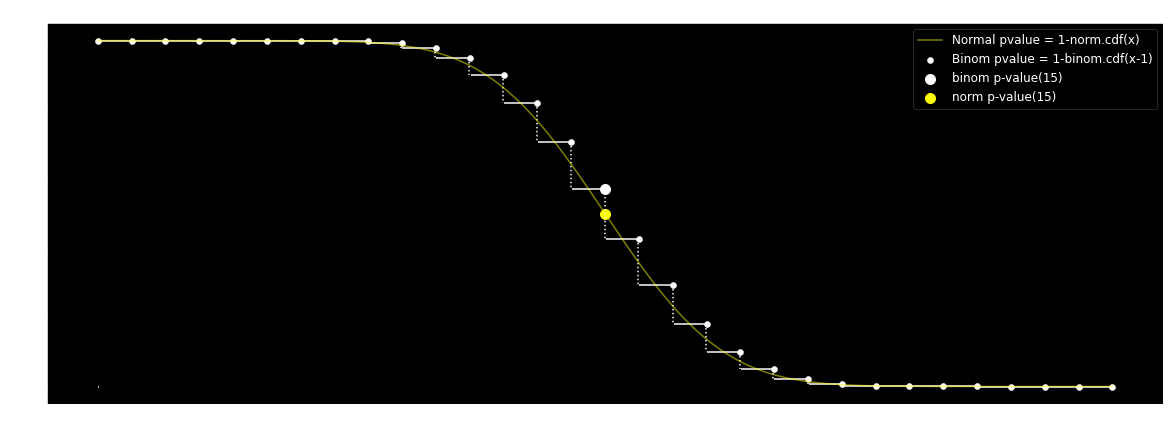

In [25]:
cmp_pvalue_binom_and_norm(30, 0.5, 15)

–í–µ–∑–¥–µ –≤–∏–¥–Ω–æ, —á—Ç–æ –±–∏–Ω–æ–º–∏–∞–ª—å–Ω–æ–µ p-value –≤—ã—à–µ pvalue, –ø–æ–ª—É—á–µ–Ω–Ω–æ–≥–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–π –∞–ø–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏–µ–π. –í –∏–¥–µ–∞–ª—å–Ω–æ–π –∞–ø–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏–∏ –±–µ–ª–∞—è –∏ –∂–µ–ª—Ç–∞—è —Ç–æ—á–∫–∏ –¥–æ–ª–∂–Ω—ã –±—ã–ª–∏ –Ω–∞—Ö–æ–¥–∏—Ç—å—Å—è –Ω–∞ –æ–¥–Ω–æ–π –≤—ã—Å–æ—Ç–µ. –ù–æ –ø—Ä–∏ —ç—Ç–æ–º, —á–µ–º –±–æ–ª—å—à–µ n –∏–ª–∏ —á–µ–º –±–ª–∏–∂–µ –∫ –∫–æ–Ω—Ü–∞–º –≥—Ä–∞—Ñ–∏–∫–∞ t, —Ç–µ–º –º–µ–Ω—å—à–µ —Ä–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É —Ç–æ—á–∫–∞–º–∏, –∏ —Ç–µ–º —Ç–æ—á–Ω–µ–µ –∞–ø–ø—Ä–æ–∫—Å–∏–º–∞—Ü–∏—è.


In [26]:
n = 20
t = 10

old_p_value = get_pvalue_by_old_logic(n, mu0, t)
print(f"p-value, –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –ø–æ —Å—Ç–∞—Ä–æ–π, –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–π —Ñ–æ—Ä–º—É–ª–µ: {old_p_value}")
normal_dist_p_value = get_pvalue_by_normal_approx(n, mu0, t)
print(f"p-value, –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –∏–∑ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º: {normal_dist_p_value}")
print(f"–†–∞–∑–Ω–∏—Ü–∞: {round(abs(old_p_value - normal_dist_p_value), 3)}")

p-value, –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –ø–æ —Å—Ç–∞—Ä–æ–π, –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–π —Ñ–æ—Ä–º—É–ª–µ: 0.5880985260009768
p-value, –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –∏–∑ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º: 0.5
–†–∞–∑–Ω–∏—Ü–∞: 0.088


In [27]:
# –ü—Ä–∏ —Ä–æ—Å—Ç–µ t
n = 20
t = 14

old_p_value = get_pvalue_by_old_logic(n, mu0, t)
print(f"p-value, –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –ø–æ —Å—Ç–∞—Ä–æ–π, –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–π —Ñ–æ—Ä–º—É–ª–µ: {old_p_value}")
normal_dist_p_value = get_pvalue_by_normal_approx(n, mu0, t)
print(f"p-value, –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –∏–∑ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º: {normal_dist_p_value}")
print(f"–†–∞–∑–Ω–∏—Ü–∞: {round(abs(old_p_value - normal_dist_p_value), 3)}")

p-value, –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –ø–æ —Å—Ç–∞—Ä–æ–π, –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–π —Ñ–æ—Ä–º—É–ª–µ: 0.057659149169921875
p-value, –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –∏–∑ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º: 0.03681913506015133
–†–∞–∑–Ω–∏—Ü–∞: 0.021


In [28]:
# –ø—Ä–∏ —Ä–æ—Å—Ç–µ n
n = 200
t = 100

old_p_value = get_pvalue_by_old_logic(n, mu0, t)
print(f"p-value, –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –ø–æ —Å—Ç–∞—Ä–æ–π, –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–π —Ñ–æ—Ä–º—É–ª–µ: {old_p_value}")
normal_dist_p_value = get_pvalue_by_normal_approx(n, mu0, t)
print(f"p-value, –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –∏–∑ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º: {normal_dist_p_value}")
print(f"–†–∞–∑–Ω–∏—Ü–∞: {round(abs(old_p_value - normal_dist_p_value), 3)}")

p-value, –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –ø–æ —Å—Ç–∞—Ä–æ–π, –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–π —Ñ–æ—Ä–º—É–ª–µ: 0.5281742395046416
p-value, –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –∏–∑ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º: 0.5
–†–∞–∑–Ω–∏—Ü–∞: 0.028


–ù–æ –∫–∞–∫ —Å–¥–µ–ª–∞—Ç—å —Ç–∞–∫, —á—Ç–æ–±—ã –¥–≤–∞ p-value —Å–æ–≤–ø–∞–ª–∏? –î–ª—è —ç—Ç–æ–≥–æ —è –ø—Ä–µ–¥–ª–∞–≥–∞—é –æ–±—Ä–∞—Ç–∏—Ç—å –≤–Ω–∏–º–∞–Ω–∏–µ, –≥–¥–µ –±–µ–ª–∞—è (–≥–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω–∞—è —á–∞—Å—Ç—å) –∏ –∂–µ–ª—Ç–∞—è –ª–∏–Ω–∏–∏ –ø–µ—Ä–µ—Å–µ–∫–∞—é—Ç—Å—è: –µ—Å–ª–∏ –±—ã –º—ã –∂–µ–ª—Ç—É—é —Ç–æ—á–∫—É –±—Ä–∞–ª–∏ –Ω–∞ –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏–∏ 2 –ª–∏–Ω–∏–π, —Ç–æ –º—ã –ø–æ–ª—É—á–∏–ª–∏ –±—ã –∞–±—Å–æ–ª—é—Ç–Ω–æ —Ç–æ—á–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ p-value. 

–ö–∞–∫ –∏–º–µ–Ω–Ω–æ –µ–µ –Ω–∞–π—Ç–∏? –ó–∞–º–µ—Ç–∏–º, —á—Ç–æ –≤–æ–æ–±—â–µ-—Ç–æ –æ–Ω–∏ –ø–µ—Ä–µ—Å–µ–∫–∞—é—Ç—Å—è –ø—Ä–∏–º–µ—Ä–Ω–æ –Ω–∞ —Å–µ—Ä–µ–¥–∏–Ω–µ –æ—Ç—Ä–µ–∑–∫–∞: –º–µ–∂–¥—É t-1 –∏ t. –ü–æ—ç—Ç–æ–º—É –ø–æ–ø—Ä–æ–±—É–µ–º "—Å–¥–≤–∏–Ω—É—Ç—å" –≥—Ä–∞—Ñ–∏–∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—è –Ω–∞ 1/2 –≤–ø—Ä–∞–≤–æ.

- $F_{\text{new}}(x) = F_{\text{old}}(x - 0.5)$ –ù–∞–ø—Ä–∏–º–µ—Ä, $F_{\text{new}}(10) = F_{\text{old}}(9.5)$

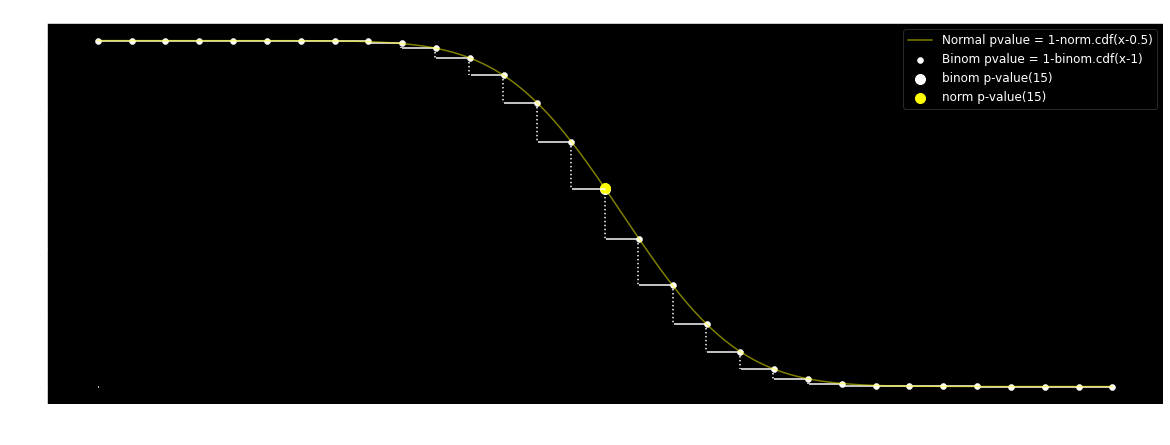

In [29]:
cmp_pvalue_binom_and_norm(30, 0.5, 15, add_to_x=-0.5)

–í–æ—Ç —Ç–µ–ø–µ—Ä—å –≤–∏–∑—É–∞–ª—å–Ω–æ —Ç–æ—á–∫–∏ —Å–æ–≤–ø–∞–ª–∏! –ü—Ä–æ–≤–µ—Ä–∏–º –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ pvalue:

In [30]:
def get_pvalue_by_normal_approx_with_addition(n, mu0, t):
    sum_mu = n * mu0
    sum_variance = n * mu0 * (1 - mu0)
    sum_std = numpy.sqrt(sum_variance)

    return 1 - norm(loc=sum_mu, scale=sum_std).cdf(t - 0.5)

In [31]:
n = 30
mu0 = 0.5
t = 19

old_p_value = get_pvalue_by_old_logic(n, mu0, t)
print(f"p-value, –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –ø–æ —Å—Ç–∞—Ä–æ–π, –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–π —Ñ–æ—Ä–º—É–ª–µ: {old_p_value}")
normal_dist_p_value = get_pvalue_by_normal_approx(n, mu0, t)
print(f"p-value, –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –∏–∑ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º: {normal_dist_p_value}")
normal_with_add_p_value = get_pvalue_by_normal_approx_with_addition(n, mu0, t)
print(f"p-value, –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –∏–∑ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º —Å –ø–æ–ø—Ä–∞–≤–∫–æ–π: {normal_with_add_p_value}")

p-value, –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –ø–æ —Å—Ç–∞—Ä–æ–π, –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–π —Ñ–æ—Ä–º—É–ª–µ: 0.10024421103298664
p-value, –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –∏–∑ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º: 0.07206351740800765
p-value, –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –∏–∑ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º —Å –ø–æ–ø—Ä–∞–≤–∫–æ–π: 0.10062131047886202


–û—Ç–ª–∏—á–Ω–æ! –ú—ã –Ω–∞—É—á–∏–ª–∏—Å—å —Ä–µ—à–∞—Ç—å —Å—Ç–∞—Ä—É—é –∑–∞–¥–∞—á–∫—É –Ω–æ–≤—ã–º –º–µ—Ç–æ–¥–æ–º. –ü–æ–ø—Ä–∞–≤–∫–∞ 1/2 –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è **–ø–æ–ø—Ä–∞–≤–∫–æ–π –Ω–∞ –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω–æ—Å—Ç—å [continuity correction](https://en.wikipedia.org/wiki/Continuity_correction).**

–¢–µ–ø–µ—Ä—å –¥–∞–≤–∞–π—Ç–µ –¥–æ–±–∞–≤–∏–º —ç—Ç—É –ø–æ–ø—Ä–∞–≤–∫—É –≤ –∫—Ä–∏—Ç–µ—Ä–∏–π –§–∏—à–µ—Ä–∞:

In [32]:
def z_criterion_pvalue(sample_mean, sample_size, mu0, variance, use_continuity_correction=False):
    if use_continuity_correction:
        # –∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä—É–µ–º –∑–Ω–∞—á–µ–Ω–∏–µ —Å—É–º–º—ã, –∫–∞–∫ –¥–µ–ª–∞–ª–∏ —ç—Ç–æ —Ä–∞–Ω–µ–µ
        sample_mean = (sample_mean * sample_size - 1/2) / sample_size
    Z_statistic = numpy.sqrt(sample_size) * (sample_mean - mu0) / numpy.sqrt(variance)
    return 1 - norm().cdf(Z_statistic) 

–ü—Ä–æ–≤–µ—Ä–∏–º, —á—Ç–æ –≤—Å–µ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ:

In [33]:
n = 30
t = 19
mu0 = 0.5
variance = mu0 * (1 - mu0)

old_p_value = get_pvalue_by_old_logic(n, mu0, t)
print(f"p-value, –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –ø–æ —Å—Ç–∞—Ä–æ–π, –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–π —Ñ–æ—Ä–º—É–ª–µ: {old_p_value}")
normal_with_add_p_value = get_pvalue_by_normal_approx_with_addition(n, mu0, t)
print(f"p-value, –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –∏–∑ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º —Å –ø–æ–ø—Ä–∞–≤–∫–æ–π: {normal_with_add_p_value}")
z_pvalue = z_criterion_pvalue(t/n, n, mu0, variance, use_continuity_correction=True)
print(f"Z-—Ç–µ—Å—Ç p-value: {z_pvalue}")

p-value, –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –ø–æ —Å—Ç–∞—Ä–æ–π, –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–π —Ñ–æ—Ä–º—É–ª–µ: 0.10024421103298664
p-value, –ø–æ–ª—É—á–µ–Ω–Ω–æ–µ –∏–∑ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º —Å –ø–æ–ø—Ä–∞–≤–∫–æ–π: 0.10062131047886202
Z-—Ç–µ—Å—Ç p-value: 0.10062131047886202


–£—Ä–∞, —á—Ç–æ –≤—Å–µ —Å–æ—à–ª–æ—Å—å! –ú—ã –ø–æ–ª—É—á–∏–ª–∏ –±–æ–ª–µ–µ —Ç–æ—á–Ω—ã–π –∫—Ä–∏—Ç–µ—Ä–∏–π!

–ï–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω–æ–µ, –Ω–∞ —á—Ç–æ –Ω–∞–¥–æ –æ–±—Ä–∞—Ç–∏—Ç—å –≤–Ω–∏–º–∞–Ω–∏–µ: –≤ Z-–∫—Ä–∏—Ç–µ—Ä–∏–π –≤ –∫–∞—á–µ—Å—Ç–≤–µ –∞—Ä–≥—É–º–µ–Ω—Ç–∞ –Ω—É–∂–Ω–æ –ø–µ—Ä–µ–¥–∞–≤–∞—Ç—å –¥–∏—Å–ø–µ—Ä—Å–∏—é –≤—ã–±–æ—Ä–∫–∏. –í –Ω–∞—à–µ–π —Ç–µ–∫—É—â–µ–π –∑–∞–¥–∞—á–µ –º—ã –µ–µ –∑–Ω–∞–ª–∏, –ø–æ—Ç–æ–º—É —á—Ç–æ —Ç—É—Ç –±—ã–ª–∞ –ø—Ä–æ—Å—Ç–∞—è –≤—ã–±–æ—Ä–∫–∞ –ë–µ—Ä–Ω—É–ª–ª–∏, –≤ –∫–æ—Ç–æ—Ä–æ–π –¥–∏—Å–ø–µ—Ä—Å–∏—è –Ω–∞–ø—Ä—è–º—É—é –≤—ã—Ä–∞–∂–∞–µ—Ç—Å—è —á–µ—Ä–µ–∑ –º–∞—Ç. –æ–∂–∏–¥–∞–Ω–∏–µ.

–ù–æ —á—Ç–æ –¥–µ–ª–∞—Ç—å, —É –Ω–∞—Å –±–æ–ª–µ–µ —Å–ª–æ–∂–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —É –≤—ã–±–æ—Ä–∫–∏ –∏ –¥–∏—Å–ø–µ—Ä—Å–∏—è –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω–∞? –û–± —ç—Ç–æ–º —É–∑–Ω–∞–µ–º –Ω–∞ —Å–ª–µ–¥—É—é—â–µ–º –∑–∞–Ω—è—Ç–∏–∏!

----

## –ò—Ç–æ–≥

–í —ç—Ç–æ–º –∑–∞–Ω—è—Ç–∏–∏ –º—ã:
- –í—Å–ø–æ–º–Ω–∏–ª–∏, —á—Ç–æ —Ç–∞–∫–æ–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∏ –∫–∞–∫–∏–µ —É –Ω–µ–≥–æ –µ—Å—Ç—å —Å–≤–æ–π—Å—Ç–≤–∞.
- –í—Å–ø–æ–º–Ω–∏–ª–∏, –∫–∞–∫ —Ñ–æ—Ä–º—É–ª–∏—Ä—É–µ—Ç—Å—è –¶–µ–Ω—Ç—Ä–∞–ª—å–Ω–∞—è –ø—Ä–µ–¥–µ–ª—å–Ω–∞—è —Ç–µ–æ—Ä–µ–º–∞ –∏ –∫–∞–∫ –µ–µ –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å.
- –£–∑–Ω–∞–ª–∏ –ø—Ä–æ Z-–∫—Ä–∏—Ç–µ—Ä–∏–π –§–∏—à–µ—Ä–∞ –∏ —Ä–µ—à–∏–ª–∏ —Å –µ–≥–æ –ø–æ–º–æ—â—å—é –∑–∞–¥–∞—á—É –ø—Ä–æ –∫–æ–Ω–≤–µ—Ä—Å–∏–∏.
    - –ö—Ä–æ–º–µ —Ç–æ–≥–æ, –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ —É–≤–∏–¥–µ–ª–∏, —á—Ç–æ —Ç–∞–∫–æ–µ –ø–æ–ø—Ä–∞–≤–∫–∞ –Ω–∞ –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω–æ—Å—Ç—å –∏ –∑–∞—á–µ–º –æ–Ω–∞ –Ω—É–∂–Ω–∞.
    - –ï–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω–æ–µ –Ω–æ: –º—ã –ø–æ–¥—Å–≤–µ—Ç–∏–ª–∏, —á—Ç–æ –≤ —ç—Ç–æ–º –∫—Ä–∏—Ç–µ—Ä–∏–∏ –Ω—É–∂–Ω–æ –∑–Ω–∞—Ç—å –¥–∏—Å–ø–µ—Ä—Å–∏—é –≤—ã–±–æ—Ä–∫–∏. –ù–æ –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ –æ–Ω–∞ –Ω–µ –≤—Å–µ–≥–¥–∞ –∏–∑–≤–µ—Å—Ç–Ω–∞.